In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [139]:
report_2015= pd.read_csv("C:\ml_workspace/2015.csv")
report_2016= pd.read_csv("C:\ml_workspace/2016.csv")
report_2017= pd.read_csv("C:\ml_workspace/2017.csv")
report_2018= pd.read_csv("C:\ml_workspace/2018.csv")
report_2019= pd.read_csv("C:\ml_workspace/2019.csv")
report_2020= pd.read_csv("C:\ml_workspace/2020.csv")
report_2021= pd.read_csv("C:\ml_workspace/2021.csv")
report_2022= pd.read_csv("C:\ml_workspace/2022.csv")
report_2023= pd.read_csv("C:\ml_workspace/WHR2023.csv")

In [140]:
#행복지수 csv 전처리
report_2015 = report_2015.rename(columns={'Happiness Score':'H2015'})
report_2015 = report_2015.rename(columns={'Economy (GDP per Capita)':'G2015'})
report_2015 = report_2015[['Country','H2015','G2015']]

report_2016 = report_2016.rename(columns={'Happiness Score':'H2016'})
report_2016 = report_2016.rename(columns={'Economy (GDP per Capita)':'G2016'})
report_2016 = report_2016[['Country','H2016','G2016']]

report_2017 = report_2017.rename(columns={'Happiness.Score':'H2017'})
report_2017 = report_2017.rename(columns={'Economy..GDP.per.Capita.':'G2017'})
report_2017 = report_2017[['Country','H2017','G2017']]

report_2018 = report_2018.rename(columns={'Score':'H2018'})
report_2018 = report_2018.rename(columns={'GDP per capita':'G2018'})
report_2018 = report_2018.rename(columns={'Country or region':'Country'})
report_2018 = report_2018[['Country','H2018','G2018']]

report_2019 = report_2019.rename(columns={'Score':'H2019'})
report_2019 = report_2019.rename(columns={'GDP per capita':'G2019'})
report_2019 = report_2019.rename(columns={'Country or region':'Country'})
report_2019 = report_2019[['Country','H2019','G2019']]

report_2020 = report_2020.rename(columns={'Ladder score':'H2020'})
report_2020 = report_2020.rename(columns={'Explained by: Log GDP per capita':'G2020'})
report_2020 = report_2020.rename(columns={'Country name':'Country'})
report_2020 = report_2020[['Country','H2020','G2020']]

report_2021 = report_2021.rename(columns={'Ladder score':'H2021'})
report_2021 = report_2021.rename(columns={'Explained by: Log GDP per capita':'G2021'})
report_2021 = report_2021.rename(columns={'Country name':'Country'})
report_2021 = report_2021[['Country','H2021','G2021']]

report_2022 = report_2022.rename(columns={'Happiness score':'H2022'})
report_2022 = report_2022.rename(columns={'Explained by: GDP per capita':'G2022'})
report_2022 = report_2022[['Country','H2022','G2022']]

report_2023 = report_2023.rename(columns={'Ladder score':'H2023'})
report_2023 = report_2023.rename(columns={'Explained by: Log GDP per capita':'G2023'})
report_2023 = report_2023.rename(columns={'Country name':'Country'})
report_2023 = report_2023[['Country','H2023','G2023']]

#데이터셋별로 Country 순서가 다르기에 merge함수로 정렬
#모든 년도에 포함되지 않은 국가는 자동 drop
pre_report = pd.merge(report_2015, report_2016, on='Country')
pre_report = pd.merge(pre_report, report_2017, on='Country')
pre_report = pd.merge(pre_report, report_2018, on='Country')
pre_report = pd.merge(pre_report, report_2019, on='Country')
pre_report = pd.merge(pre_report, report_2020, on='Country')
pre_report = pd.merge(pre_report, report_2021, on='Country')
pre_report = pd.merge(pre_report, report_2022, on='Country')
pre_report = pd.merge(pre_report, report_2023, on='Country')

#결측치 확인: 없음
pre_report.isnull().sum()

#2022 데이터가 문자열로 처리되고 있어 연속형 데이터로 전환
pre_report.dtypes
pre_report['H2022'] = pre_report['H2022'].str.replace(',', '.')
pre_report['G2022'] = pre_report['G2022'].str.replace(',', '.')
pre_report['H2022'] = pre_report['H2022'].astype(float)
pre_report['G2022'] = pre_report['G2022'].astype(float)

#소수점 자릿수 통일
pre_report = pre_report.round(3)

#Happy_report 생성
H_columns = [col for col in pre_report.columns if 'H' in col]
Happy_report = pre_report[H_columns]
Happy_report = pd.concat([pre_report['Country'],Happy_report], axis=1)

#Happy_report 전처리
Happy_report.rename(columns={'H2015': '2015'}, inplace=True)
Happy_report.rename(columns={'H2016': '2016'}, inplace=True)
Happy_report.rename(columns={'H2017': '2017'}, inplace=True)
Happy_report.rename(columns={'H2018': '2018'}, inplace=True)
Happy_report.rename(columns={'H2019': '2019'}, inplace=True)
Happy_report.rename(columns={'H2020': '2020'}, inplace=True)
Happy_report.rename(columns={'H2021': '2021'}, inplace=True)
Happy_report.rename(columns={'H2022': '2022'}, inplace=True)
Happy_report.rename(columns={'H2023': '2023'}, inplace=True)

#Happy_report에 0으로 초기화된 2023열 추가
#if len(Happy_report)<120:
#    Happy_report = pd.concat([Happy_report, pd.DataFrame({'2023': [0] * 117})], axis=1)  

#Happy_map 데이터프레임 생성
Happy_map = Happy_report.reset_index()
Happy_map = Happy_map.melt(id_vars=['Country'], var_name='Year')
Happy_map = Happy_map.drop(Happy_report.index[0:117]).reset_index(drop=True)

#GDP_report 생성
g_columns = [col for col in pre_report.columns if 'G' in col]
GDP_report = pre_report[g_columns]
GDP_report = pd.concat([pre_report['Country'],GDP_report], axis=1)

#GDP 전처리
GDP_report.rename(columns={'G2015': '2015'}, inplace=True)
GDP_report.rename(columns={'G2016': '2016'}, inplace=True)
GDP_report.rename(columns={'G2017': '2017'}, inplace=True)
GDP_report.rename(columns={'G2018': '2018'}, inplace=True)
GDP_report.rename(columns={'G2019': '2019'}, inplace=True)
GDP_report.rename(columns={'G2020': '2020'}, inplace=True)
GDP_report.rename(columns={'G2021': '2021'}, inplace=True)
GDP_report.rename(columns={'G2022': '2022'}, inplace=True)
GDP_report.rename(columns={'G2023': '2023'}, inplace=True)

#GDP_report에 0으로 초기화된 2023열 추가
#if len(GDP_report)<120:
#    GDP_report = pd.concat([GDP_report, pd.DataFrame({'2023': [0] * 117})], axis=1)    

#GDP_map 데이터프레임 생성
GDP_map = GDP_report.reset_index()
GDP_map = GDP_map.melt(id_vars=['Country'], var_name='Year')
GDP_map = GDP_map.drop(Happy_report.index[0:117]).reset_index(drop=True)

In [141]:
#covid csv 전처리
covid_report = pd.read_csv("C:\ml_workspace/WHO-COVID-19-global-data.csv")
covid_report = covid_report[['Country','Date_reported','New_cases']]
covid_report = covid_report.drop(covid_report.index[0:54])

#년도를 기준으로 데이터를 그룹화하고, 그룹별로 정렬
covid_report['Date_reported'] = pd.to_datetime(covid_report['Date_reported'])
sorted_data = covid_report.sort_values('Date_reported')
sorted_data['Year'] = sorted_data['Date_reported'].dt.year
result = sorted_data.groupby('Year').apply(lambda x: x.sort_values('Date_reported')).reset_index(drop=True)
covid_report = result.drop('Date_reported',axis=1)
covid_report = covid_report.groupby(['Country','Year']).sum().reset_index()

#covid_report 몇몇 국가 재명명 (두 나라는 못찾음)
#print(Happy_report[~Happy_report['Country'].isin(covid_report['Country'])])
covid_report.loc[covid_report['Country'] == 'Republic of Korea', 'Country'] = 'South Korea'
covid_report.loc[covid_report['Country'] == 'The United Kingdom', 'Country'] = 'United Kingdom'
covid_report.loc[covid_report['Country'] == 'United States of America', 'Country'] = 'United States'
covid_report.loc[covid_report['Country'] == 'Russian Federation', 'Country'] = 'Russia'
covid_report.loc[covid_report['Country'] == 'Venezuela (Bolivarian Republic of)', 'Country'] = 'Venezuela'
covid_report.loc[covid_report['Country'] == 'Bolivia (Plurinational State of)', 'Country'] = 'Bolivia'
covid_report.loc[covid_report['Country'] == 'Republic of Moldova', 'Country'] = 'Moldova'
covid_report.loc[covid_report['Country'] == 'Kosovo[1]', 'Country'] = 'Kosovo'
covid_report.loc[covid_report['Country'] == 'Viet Nam', 'Country'] = 'Vietnam'
covid_report.loc[covid_report['Country'] == 'Iran (Islamic Republic of)', 'Country'] = 'Iran'
covid_report.loc[covid_report['Country'] == 'United Republic of Tanzania', 'Country'] = 'Tanzania'

#Happy_report 국가 리스트와 교집합 형성
covid_report = pd.merge(Happy_report['Country'], covid_report, on='Country', how='inner')
covid_report.rename(columns={'New_cases': 'Cumulative_cases'}, inplace=True)

# covid_map에 국가별로 2015~2019년에 해당하는 행 추가
countries = covid_report['Country'].unique()
new_rows = []
for country in countries:
    new_rows.append({'Country': country, 'Year': 2015, 'Cumulative_cases': 0})
    new_rows.append({'Country': country, 'Year': 2016, 'Cumulative_cases': 0})
    new_rows.append({'Country': country, 'Year': 2017, 'Cumulative_cases': 0})
    new_rows.append({'Country': country, 'Year': 2018, 'Cumulative_cases': 0})
    new_rows.append({'Country': country, 'Year': 2019, 'Cumulative_cases': 0})
covid_map = pd.concat([covid_report, pd.DataFrame(new_rows)], ignore_index=True)
covid_map = covid_map.sort_values(['Country', 'Year']).reset_index(drop=True)
covid_map['Year']=covid_map['Year'].astype(str)

#업데이트된 국가리스트, 별도 데이터 프레임으로 추출
countries = pd.DataFrame(countries)
countries.columns = ['Country']
countries = countries.sort_values(['Country'])

#covid_report 완성
covid_report = covid_map['Cumulative_cases']
covid_report = covid_report.values.reshape(-1,9)
covid_report = pd.DataFrame(covid_report, columns=['2015','2016','2017','2018','2019','2020','2021','2022','2023'])
covid_report = pd.concat([countries,covid_report], axis=1).reset_index(drop=True)

#Gcountries로 동기화
Happy_report = pd.merge(countries, Happy_report, on='Country', how='inner')
GDP_report = pd.merge(countries, GDP_report, on='Country', how='inner')
Happy_map = pd.merge(countries, Happy_map, on='Country', how='inner')
GDP_map = pd.merge(countries, GDP_map, on='Country', how='inner')

In [148]:
#Happy_choropleth
fig = px.choropleth(Happy_map.sort_values("Year"),
                    locations = "Country", 
                    color = "value", 
                    locationmode = "country names",
                    animation_frame = "Year")
fig.update_layout(title = "Happiness by Countries")
fig.show()
Happy_map

,Country,Year,value
0,Afghanistan,2015,3.575
1,Afghanistan,2016,3.360
2,Afghanistan,2017,3.794
3,Afghanistan,2018,3.632
4,Afghanistan,2019,3.203
...,...,...,...
1030,Zimbabwe,2019,3.663
1031,Zimbabwe,2020,3.299
1032,Zimbabwe,2021,3.145
1033,Zimbabwe,2022,2.995


In [145]:
#GDP_choropleth
fig = px.choropleth(GDP_map.sort_values("Year"),
                    locations = "Country",
                    color = "value", 
                    locationmode = "country names", 
                    animation_frame = "Year") 
fig.update_layout(title = "GDP by Countries") 
fig.show()
GDP_map

,Country,Year,value
0,Afghanistan,2015,0.320
1,Afghanistan,2016,0.382
2,Afghanistan,2017,0.401
3,Afghanistan,2018,0.332
4,Afghanistan,2019,0.350
...,...,...,...
1030,Zimbabwe,2019,0.366
1031,Zimbabwe,2020,0.426
1032,Zimbabwe,2021,0.457
1033,Zimbabwe,2022,0.947


In [147]:
#covid_choropleth
fig = px.choropleth(covid_map.sort_values("Year"),
                    locations = "Country",
                    color = "Cumulative_cases", 
                    locationmode = "country names", 
                    animation_frame = "Year") 
fig.update_layout(title = "covid by Countries") 
fig.show()
covid_map

,Country,Year,Cumulative_cases
0,Afghanistan,2015,0
1,Afghanistan,2016,0
2,Afghanistan,2017,0
3,Afghanistan,2018,0
4,Afghanistan,2019,0
...,...,...,...
1030,Zimbabwe,2019,0
1031,Zimbabwe,2020,13625
1032,Zimbabwe,2021,198103
1033,Zimbabwe,2022,48372


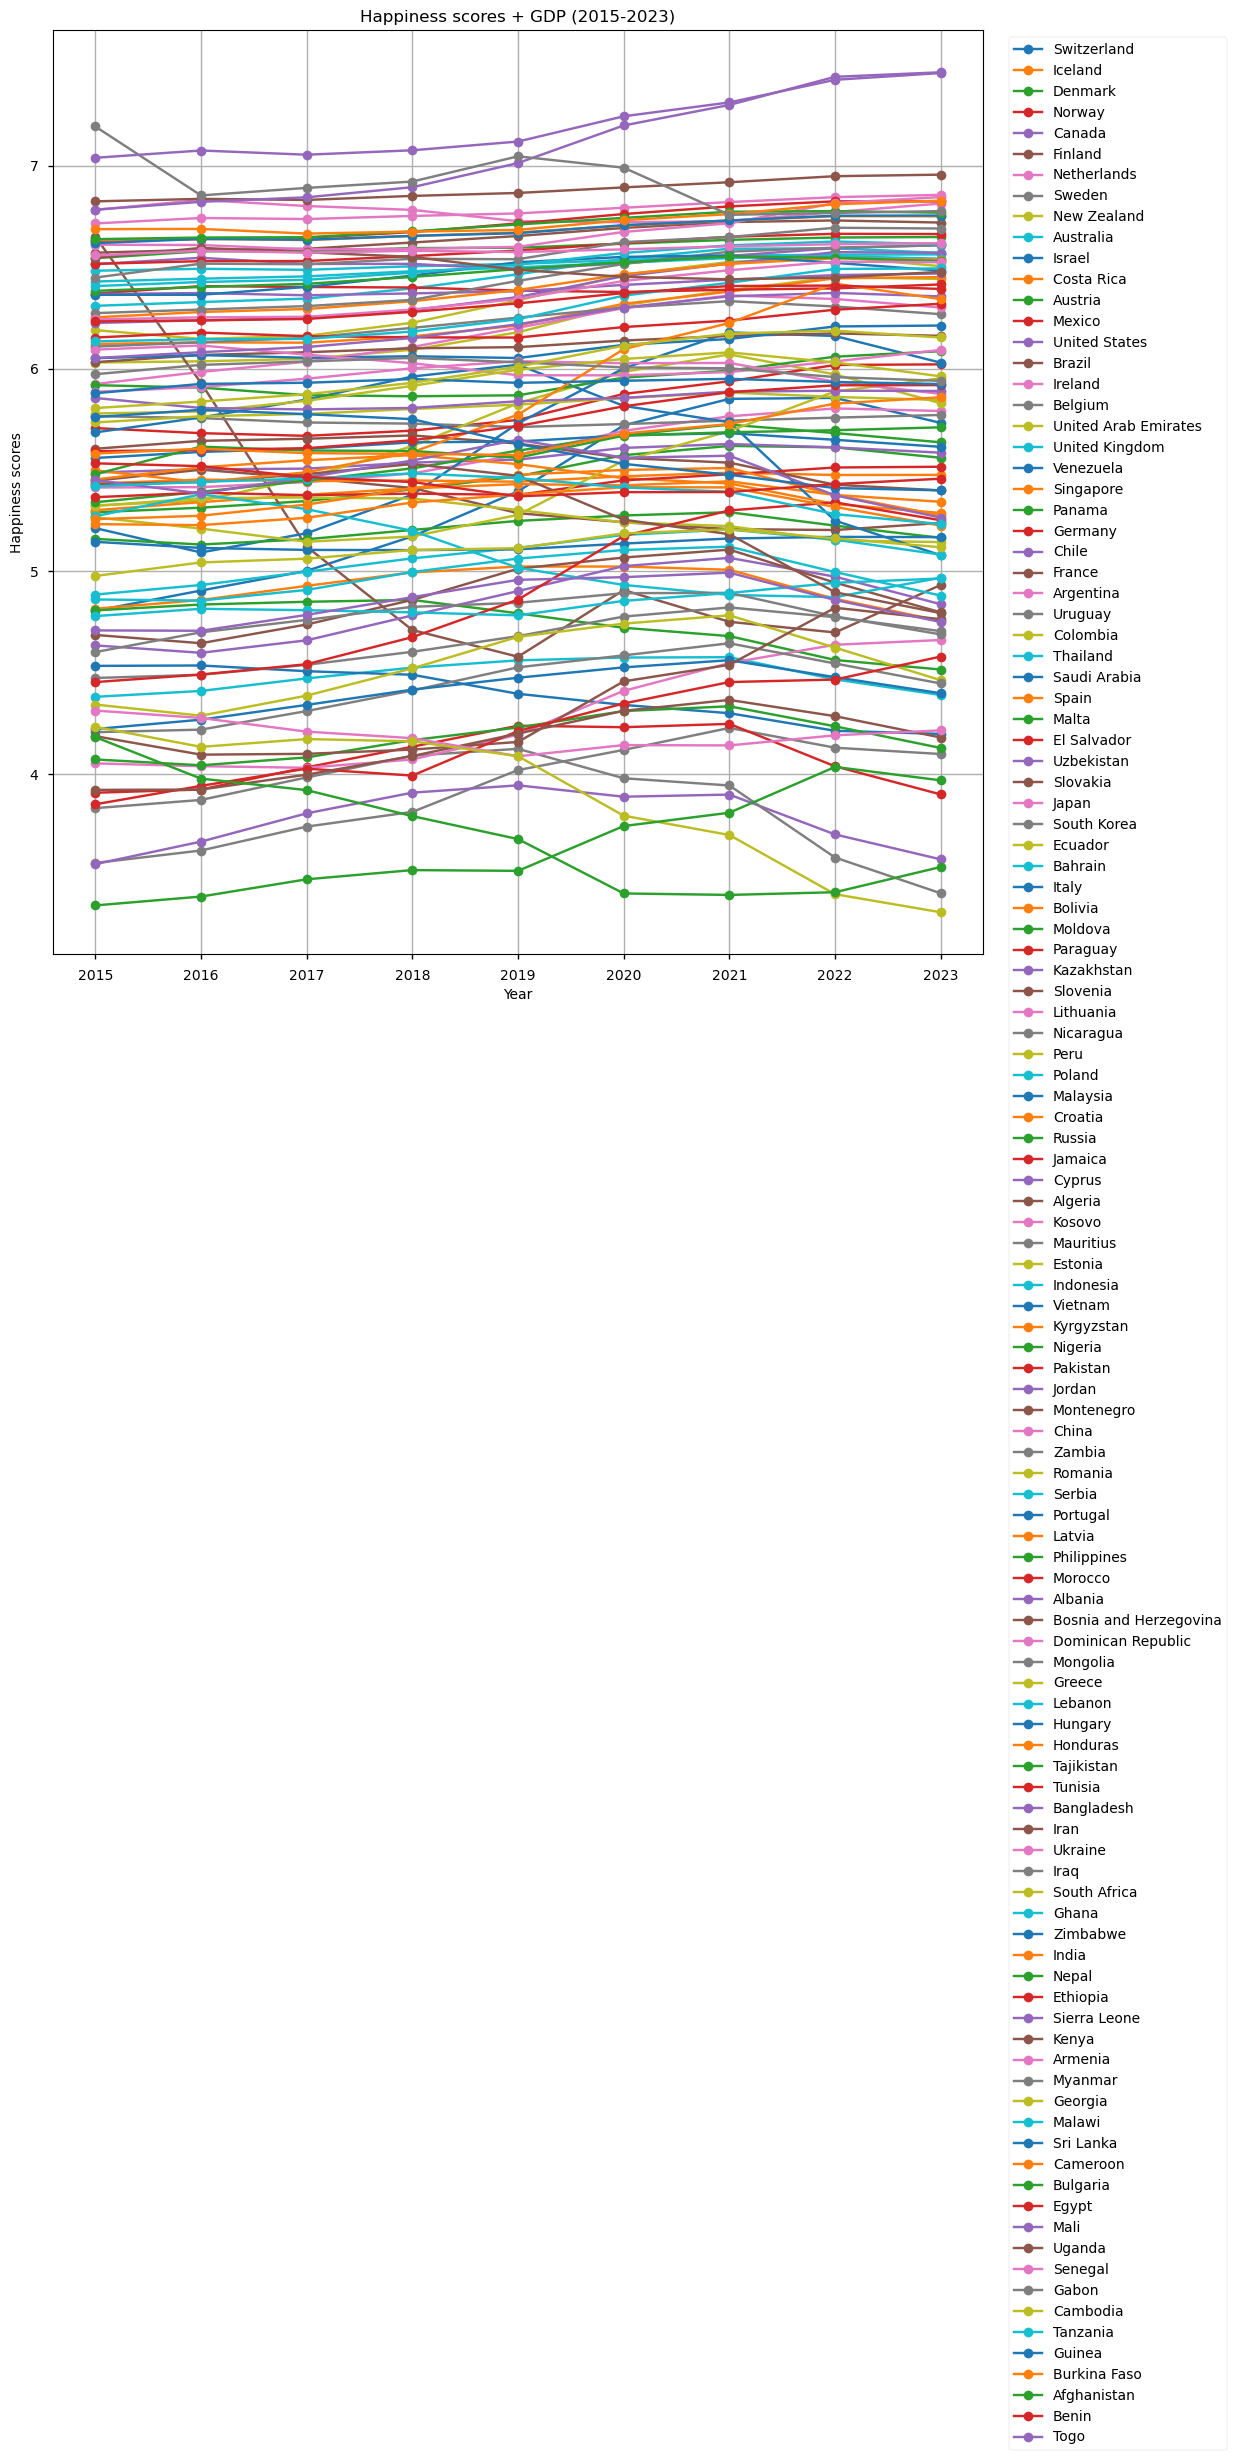

,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,4.233934,4.135052,4.173444,4.162389,4.089025,3.795750,3.700511,3.408700,3.319574
1,5.340953,5.392316,5.447797,5.508155,5.595468,5.671385,5.723620,5.682053,5.636494
2,5.447239,5.501410,5.459968,5.411132,5.287215,5.242417,5.208230,5.204153,5.238987
3,5.885083,5.909164,5.950030,6.001339,6.036182,6.026510,6.027651,5.935312,5.875368
4,5.325176,5.348428,5.461803,5.617622,5.828875,5.983909,6.069815,5.971076,5.828968
...,...,...,...,...,...,...,...,...,...
110,4.885884,4.932991,4.998400,5.064304,5.116349,5.179882,5.206659,5.156691,5.082744
111,6.649882,5.929817,5.121917,4.711146,4.579358,4.907862,4.751557,4.699026,4.933302
112,4.806098,4.905782,5.002667,5.172673,5.394778,5.720198,5.850678,5.855349,5.732158
113,4.534267,4.536260,4.508030,4.490561,4.396577,4.341841,4.300968,4.214285,4.199001


In [129]:
#선형회귀, 독립변수:GDP, 종속변수:Happiness
#Happiness는 이미 GDP가 포함된 값인데 한 번 더 사용한 선형회귀 == 별 가치가 없다.
#독립변수로 사용할 질병관련 데이터셋이 필요
from sklearn.linear_model import LinearRegression

# GDP를 독립변수로 한 Happiness scores
x = GDP_report.drop('Country', axis=1)
y = Happy_report.drop('Country', axis=1)

x_np = x.values
y_np = y.values

model = LinearRegression()
model.fit(x_np, y_np)
y_pred_np = model.predict(x_np)
y_pred = pd.DataFrame(y_pred_np, columns=y.columns)

#GDP와 행복지수의 상관관계를 강조한 보고서
Score_report = pd.concat([countries,y_pred], axis=1)

# Score_report의 선형 그래프
df = Score_report
df = df.drop('Country', axis=1)

plt.figure(figsize=(12, 12))
for i in range(len(df)):
    plt.plot(df.columns, df.iloc[i], marker='o', label = Score_report['Country'][i])
plt.xlabel('Year')
plt.ylabel('Happiness scores')
plt.title('Happiness scores + GDP (2015-2023)')
plt.legend(bbox_to_anchor=(1.02, 1))
plt.grid(True)

plt.show()
y_pred

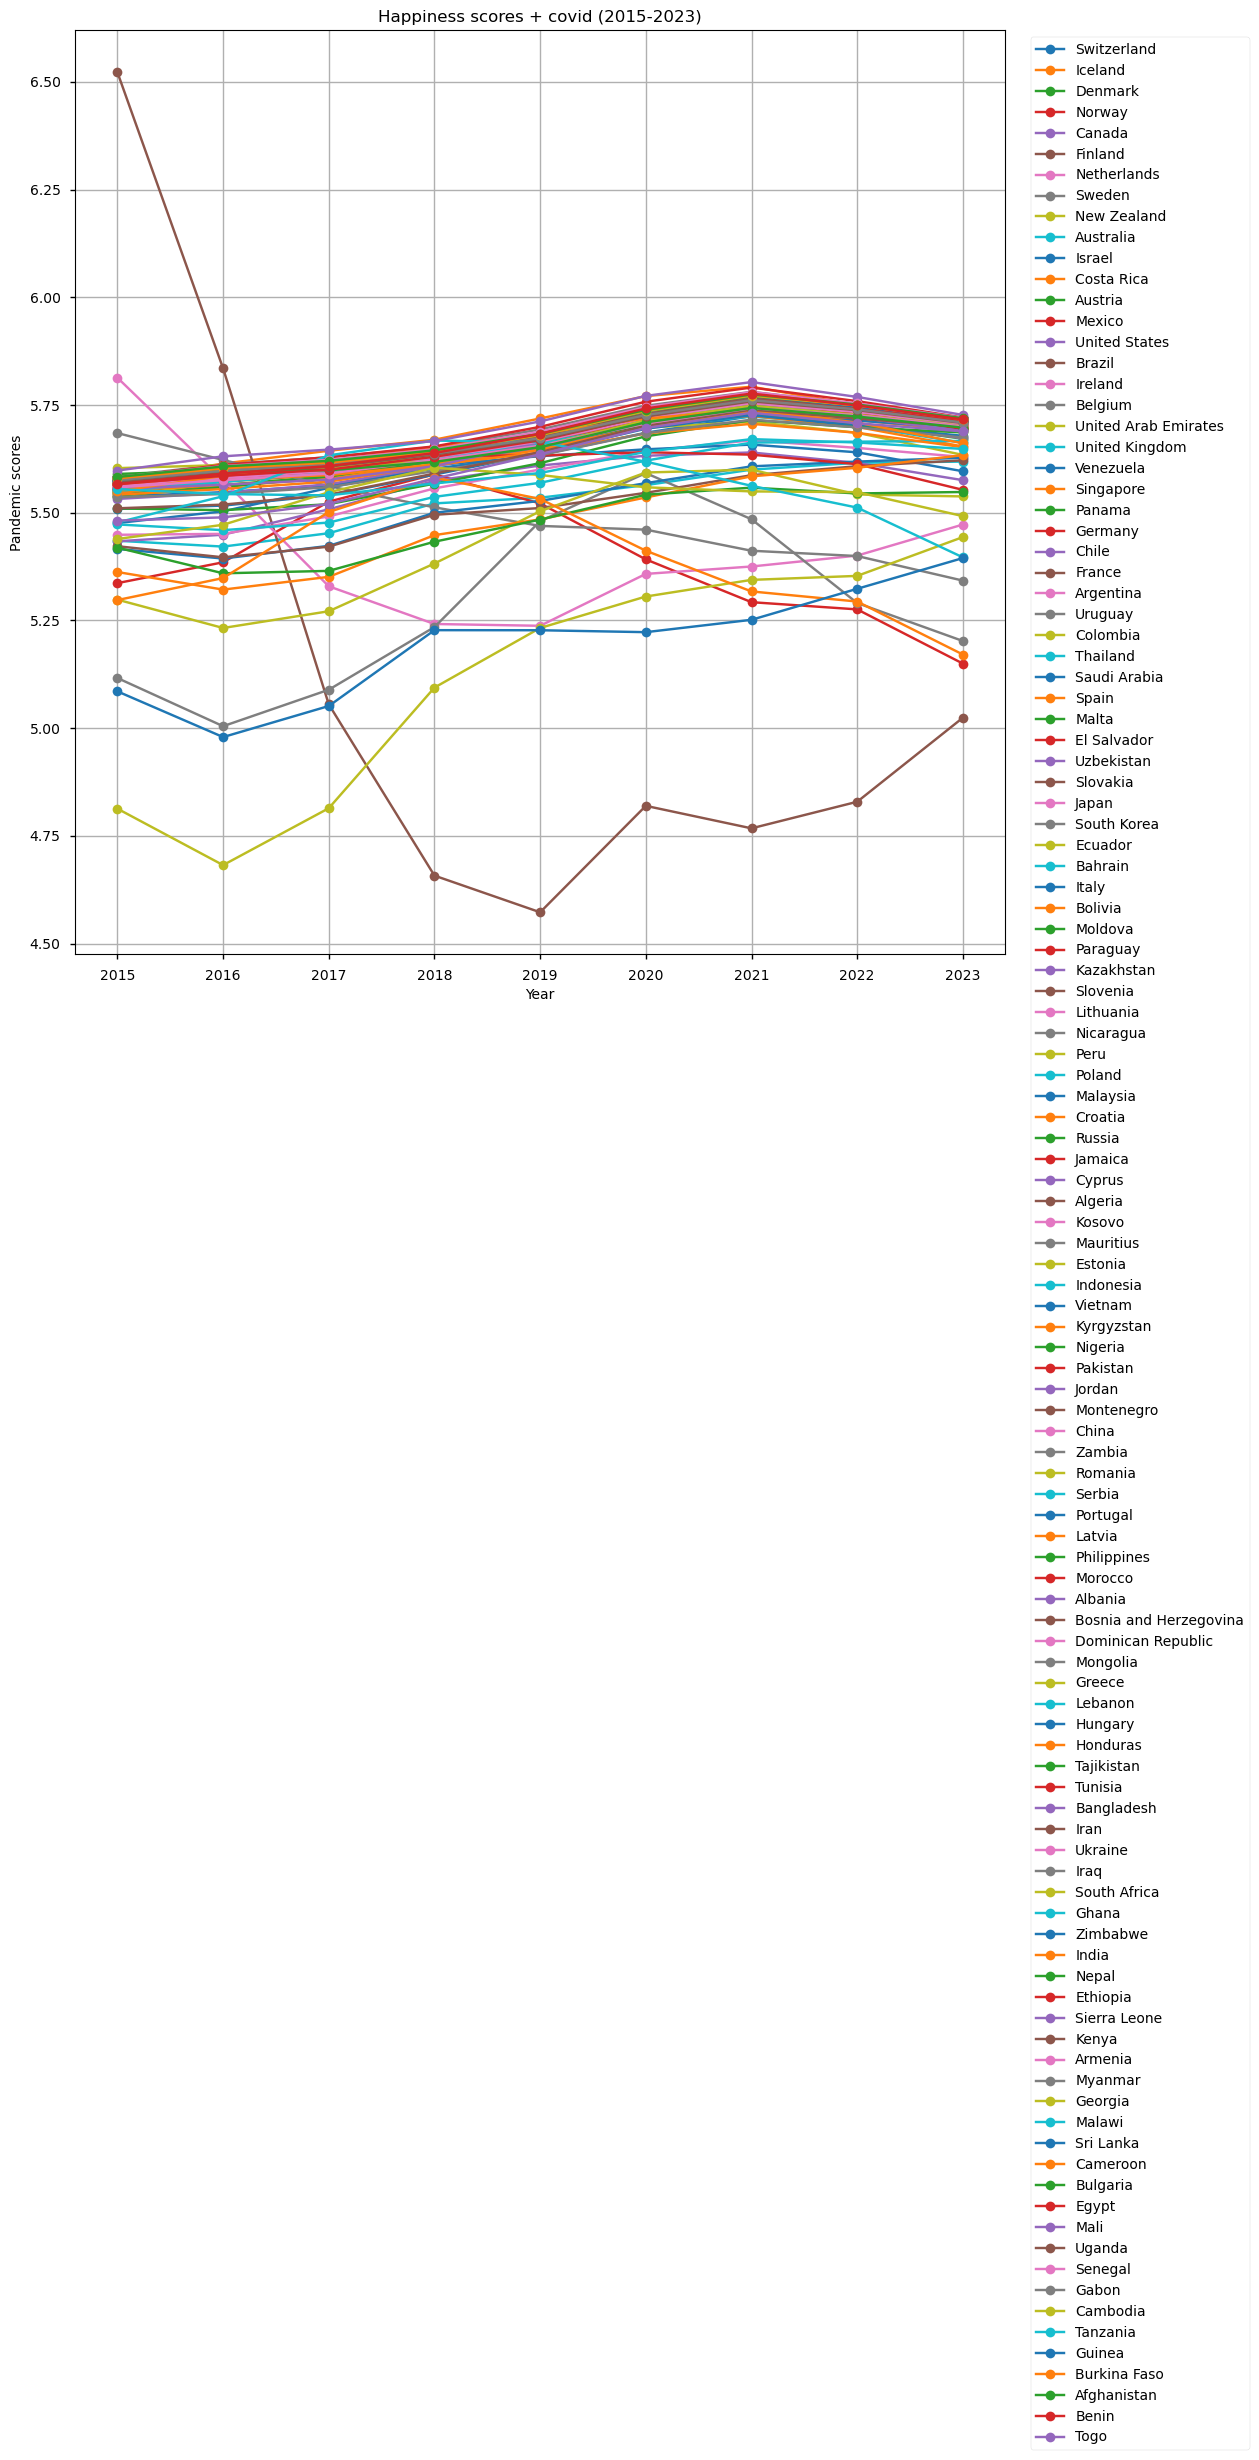

,Country,Year,value
0,Afghanistan,2015,5.578373
1,Albania,2015,5.545210
2,Algeria,2015,5.581776
3,Argentina,2015,5.560441
4,Armenia,2015,5.580381
...,...,...,...
1030,Uzbekistan,2023,5.394774
1031,Venezuela,2023,5.717366
1032,Vietnam,2023,5.719374
1033,Zambia,2023,5.716623


In [143]:
#선형회귀, 독립변수:covid, 종속변수:Happiness
x = covid_report.drop('Country', axis=1)
y = Happy_report.drop('Country', axis=1)

x_np = x.values
y_np = y.values

model = LinearRegression()
model.fit(x_np, y_np)
y_pred_np = model.predict(x_np)
y_pred = pd.DataFrame(y_pred_np, columns=y.columns)

#covid와 Happyiness의 상관관계를 강조한 보고서
Score_report = pd.concat([countries,y_pred], axis=1)

# Score_report의 선형 그래프
df = Score_report
df = df.drop('Country', axis=1)

plt.figure(figsize=(12, 12))
for i in range(len(df)):
    plt.plot(df.columns, df.iloc[i], marker='o', label = Score_report['Country'][i])
plt.xlabel('Year')
plt.ylabel('Pandemic scores')
plt.title('Happiness scores + covid (2015-2023)')
plt.legend(bbox_to_anchor=(1.02, 1))
plt.grid(True)

plt.show()

#Happiness는 2023값이 없고
#covid는 6월초까지의 2023값이 있다.